# Description of kmeans Algorithm and MNIST Dataset

Kmeans is an algorithm used to cluster data when we do not know what attributes are assigned to each desired cluster. The algorithm relies on linear algebra to mathematically cluster the data without inherent knowledge of what the data actually represents. Clusterings from the kmeans algorithm are said to be suboptimal, as it is difficult to find optimal pairings without knowing what a "standard" or what we will call "representative" member of each cluster looks like. We first set the representative vectors of each cluster to random values. After this, for each vector in our dataset we find the mean squared distance between the selected vector and each representative vector, and assign the selected vector to the cluster with the representative vector which has the minimal mean squared distance. After grouping all vectors in the dataset, we change the representative vector of each cluster to the mean of all the vectors in that cluster. We iterate this process a set number of times until we are satisfied with the suboptimal clustering.

For this example we will be using the MNIST dataset, which contains 28x28 pixel images of handwritten digits. These images are represented as 28x28 arrays of grayscale pixel values, with 0 representing black and 255 representing white. We will "flatten" these arrays into one-dimensional vectors with length 784 in order to run the algorithm.

In [27]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

In [28]:
#Loading in the mnist image data
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

In [29]:
#Formatting each 24x24 array into a one-dimensional 784-array
x = [i.flatten() for i in xtrain]

In [30]:
#Defining the kmeans function for clustering
def kmeans(num_clusters, data, iters):
    #iters specifies the total number of times the kmeans algorithm
    #should run
    representatives = []
    clustered = []
    for i in range(num_clusters):
        #populating our base representatives with random arrays filled
        #with values from 0 to 255, which match the pixel data
        representatives.append(np.random.randint(256, size = data[1].size))
    for i in range(num_clusters):
        #creating arrays to represent each cluster
        clustered.append([])
    data = np.asarray(data)
    for i in range(iters):
        #print(f"on iteration {i + 1} of {iters}")
        for j in range(len(data)):
            mindist = 100000
            closest_ind = 0
            for k in range(len(representatives)):
                #calculating the mean squared distance between each
                #vector in the data and each representative
                diff = np.subtract(data[j], representatives[k])
                squared = np.multiply(diff, diff)
                total = np.divide(squared.sum(), squared.size)
                if total < mindist:
                    mindist = total
                    closest_ind = k
            #placing the current data vector into the cluster
            #corresponding to the representative that was
            #closest
            clustered[closest_ind].append(np.asarray(data[j]))
        #Updating the representative vectors
        for j in range(len(clustered)):
            #checking if the cluster has any vectors in it
            if clustered[j]:
                sumvec = np.zeros(representatives[0].size)
                for k in range(len(clustered[j])):
                    sumvec = np.add(sumvec, clustered[j][k])
                mean = np.divide(sumvec, len(clustered[j]))
                #Setting the representative equal to the mean of
                #vectors in the cluster
                representatives[j] = np.around(mean)
            else:
                #if no vectors in the cluster, try a new random vector
                #as the representative for that cluster
                representatives[j] = np.random.randint(256, size = data[1].size)
    #returning a tuple of the clustered vectors and the representatives
    #for each cluster
    return (clustered, representatives)

Now that we have our function defined, let's run the algorithm with 20 iterations on our images. We will use 10 clusters, as there are 10 digits (0-9) represented in the dataset

In [31]:
(clustered_vectors, reps) = kmeans(10, x, 20)

We can now take a look at how many of our images were classified into each cluster

In [32]:
for i in range(len(clustered_vectors)):
    print(f"Kmeans classified {len(clustered_vectors[i])} images into group {i + 1}")

Kmeans classified 258503 images into group 1
Kmeans classified 81189 images into group 2
Kmeans classified 179594 images into group 3
Kmeans classified 192196 images into group 4
Kmeans classified 86185 images into group 5
Kmeans classified 95224 images into group 6
Kmeans classified 62390 images into group 7
Kmeans classified 96740 images into group 8
Kmeans classified 81571 images into group 9
Kmeans classified 66408 images into group 10


It looks as if each cluster was assigned a fair number of images, so now we can take a look at what the representative image for each cluster looks like. As mentioned before, the representative images are the "average" of all of the images in that cluster.

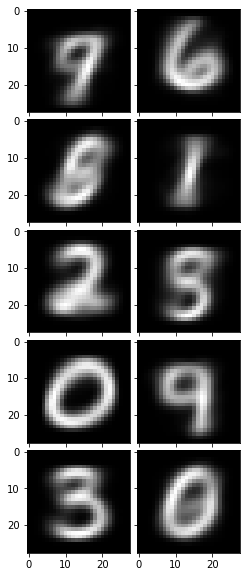

In [34]:
formatted_reps = [i.reshape(28, 28) for i in reps]

from mpl_toolkits.axes_grid1 import ImageGrid
fig = plt.figure(figsize=(10,10))
grid = ImageGrid(fig, 111,
                nrows_ncols=(5, 2),
                axes_pad=0.1)
for ax, im in zip(grid, formatted_reps):
    ax.imshow(im, cmap='gray')
    
plt.show()

## Results

As we can see, the results are not exactly as expected. Despite being clustered into 10 different groups, not all of the digits are represented. Digits 0, 1, 2, 3, 5(somewhat), 6, 8, and 9 are very clearly represented, while 4, and 7 do not seem to appear. It is important to remember that the algorithm has no concept of digits, so these groups were selected solely on their "distance" from the representative images of each category. This can explain why some digits were not clearly represented. The digits 4 and 7 tend to somewhat resemble a handwritten 9, which could be the reason for 9 appearing twice in the representative images. We can also see that the 0 cluster in the bottom right image also has elements of a handwritten 6, which is not unreasonable mistake.

Now let us check if simply increasing the number of iterations increases the accuracy of these clusters.

In [35]:
(pics_100, groups_100) = kmeans(10, x, 100)

Now we can take a look at how many images were classified into each cluster after 100 iterations

In [37]:
for i in range(len(pics_100)):
    print(f"Kmeans classified {len(pics_100[i])} images into group {i + 1}")

Kmeans classified 784728 images into group 1
Kmeans classified 329731 images into group 2
Kmeans classified 648742 images into group 3
Kmeans classified 0 images into group 4
Kmeans classified 355269 images into group 5
Kmeans classified 1659617 images into group 6
Kmeans classified 883097 images into group 7
Kmeans classified 0 images into group 8
Kmeans classified 845245 images into group 9
Kmeans classified 493571 images into group 10


We can see that this time two clusters were not assigned any images. Let's again take a look at the representative images for each cluster.

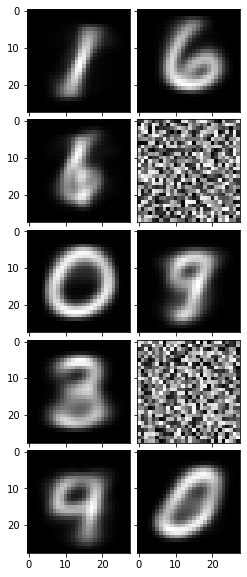

In [38]:
formatted_reps = [i.reshape(28, 28) for i in groups_100]

from mpl_toolkits.axes_grid1 import ImageGrid
fig = plt.figure(figsize=(10,10))
grid = ImageGrid(fig, 111,
                nrows_ncols=(5, 2),
                axes_pad=0.1)
for ax, im in zip(grid, formatted_reps):
    ax.imshow(im, cmap='gray')
    
plt.show()

From the results we can see that simply increasing the number of iterations does not improve the quality of the clustering. Additionally, I should mention that picking representative images for each digit out of the dataset and making sure to have one of each handwritten digit represented defeats the purpose of the algorithm. With accurate starting representatives, an optimal clustering can be achieved in a single iteration.

## Predicting

Let's use the first clustering that we performed to try and predict a handwritten digit that the algorithm has not yet seen. First let's map the representative images to the digit that they most closely represent.

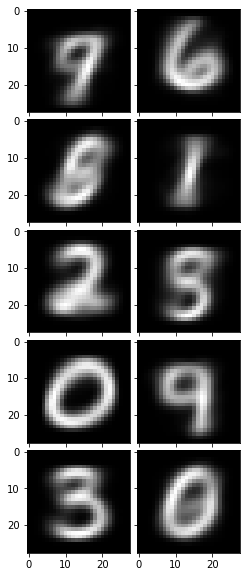

In [39]:
#Here are the results again to refresh
formatted_reps = [i.reshape(28, 28) for i in reps]

fig = plt.figure(figsize=(10,10))
grid = ImageGrid(fig, 111,
                nrows_ncols=(5, 2),
                axes_pad=0.1)
for ax, im in zip(grid, formatted_reps):
    ax.imshow(im, cmap='gray')
    
plt.show()

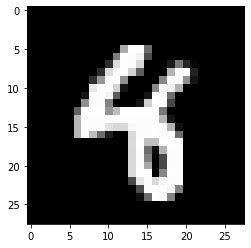

In [40]:
mappings = ["9", "6", "8", "1", "2", "5", "0", "9 or 4", "3", "0 or 6"]
#We only need to create an array not a dict as the indices serve as the keys
#Now let's select a random image from the xtest variable we created earlier
to_predict = xtest[np.random.randint(len(xtest))]
#and display it
plt.imshow(to_predict, cmap="gray")

We can see that the image appears to be an 8, however it is not perfectly written. This should be an interesting test of our clusters.

In [41]:
to_predict_flattened = to_predict.flatten()
#To fit into a cluster, we simply find the representative vector from our results that has the minimal mean squared
#distance from our to_predict flattened vector
mindist = 100000
min_index = 0
for i in range(len(reps)):
    diff = np.subtract(to_predict_flattened, reps[i])
    squared = np.multiply(diff, diff)
    dist = np.divide(squared.sum(), squared.size)
    if dist < mindist:
        mindist = dist
        min_index = i
#Now we can print out the prediction
print(mappings[min_index])

9 or 4


Interestingly, the "nearest" representative was not the cluster representing 8, but the cluster which was a hybrid between 9 and 4. Let's compare the representative image to the test image.

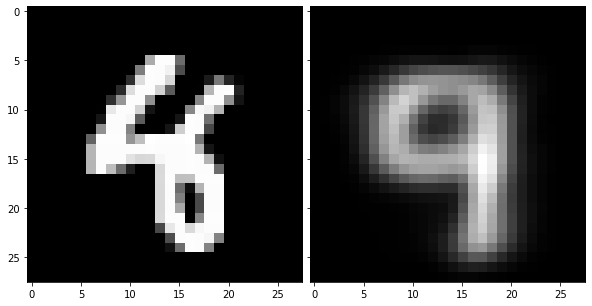

In [42]:
fig = plt.figure(figsize=(10,10))
grid = ImageGrid(fig, 111,
                nrows_ncols=(1, 2),
                axes_pad=0.1)
for ax, im in zip(grid, [to_predict, reps[min_index].reshape(28,28)]):
    ax.imshow(im, cmap='gray')
    
plt.show()

The results are not perfect, of course, but we can see the points of similarity in the two images. The handwritten 8 is drawn with a large upper half and narrower bottom half, which is likely why it was categorized into the wrong category.